In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0167-09.PREC_F.nc')
PREC_F = data1.variables['PREC_F'][0,250:350,1000:1500]
lont = data1.variables['TLONG'][250:350,1000:1500]
latt = data1.variables['TLAT'][250:350,1000:1500]
PREC_F[PREC_F == -1.0] = np.nan
PREC_F[PREC_F > 100] = np.nan

In [14]:
#dtat1

NameError: name 'dtat1' is not defined

In [4]:
lont

array([[350.05, 350.15, 350.25, ...,  39.75,  39.85,  39.95],
       [350.05, 350.15, 350.25, ...,  39.75,  39.85,  39.95],
       [350.05, 350.15, 350.25, ...,  39.75,  39.85,  39.95],
       ...,
       [350.05, 350.15, 350.25, ...,  39.75,  39.85,  39.95],
       [350.05, 350.15, 350.25, ...,  39.75,  39.85,  39.95],
       [350.05, 350.15, 350.25, ...,  39.75,  39.85,  39.95]])

In [5]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0167-09.EVAP_F.nc')
EVAP_F = data1.variables['EVAP_F'][0,250:350,1000:1500]
lont = data1.variables['TLONG'][250:350,1000:1500]
latt = data1.variables['TLAT'][250:350,1000:1500]
EVAP_F[EVAP_F == -1.0] = np.nan
EVAP_F[EVAP_F > 100] = np.nan

In [6]:
fresh = PREC_F - EVAP_F

In [7]:
freshmean = fresh.mean(axis=1)

In [8]:
months = [f"{x:02d}" for x in range(7,11)]
years = [f"{x:04d}" for x in range(141,181)]
i =0
result = np.zeros((160,700))

In [9]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PREC_F.nc')
        PREC_F = data.variables['PREC_F'][0,:,:]
        lont = data.variables['TLONG'][:,:]
        latt = data.variables['TLAT'][:,:]
        lont = lont[280:344,700:1400]
        latt = latt[280:344,700:1400]
        PREC_F = PREC_F[280:344,700:1400]
        data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.EVAP_F.nc')
        EVAP_F = data.variables['EVAP_F'][0,:,:]
        EVAP_F = EVAP_F[280:344,700:1400]       
        plotvar = PREC_F - EVAP_F
        
        aveplot = plotvar.mean(axis=0)
        
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [10]:
A = np.arange(160)
B = np.arange(700)
xx, yy = np.meshgrid(B, A)

In [11]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,190,200,210,220,230,245]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,800,1000,1200,1500]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

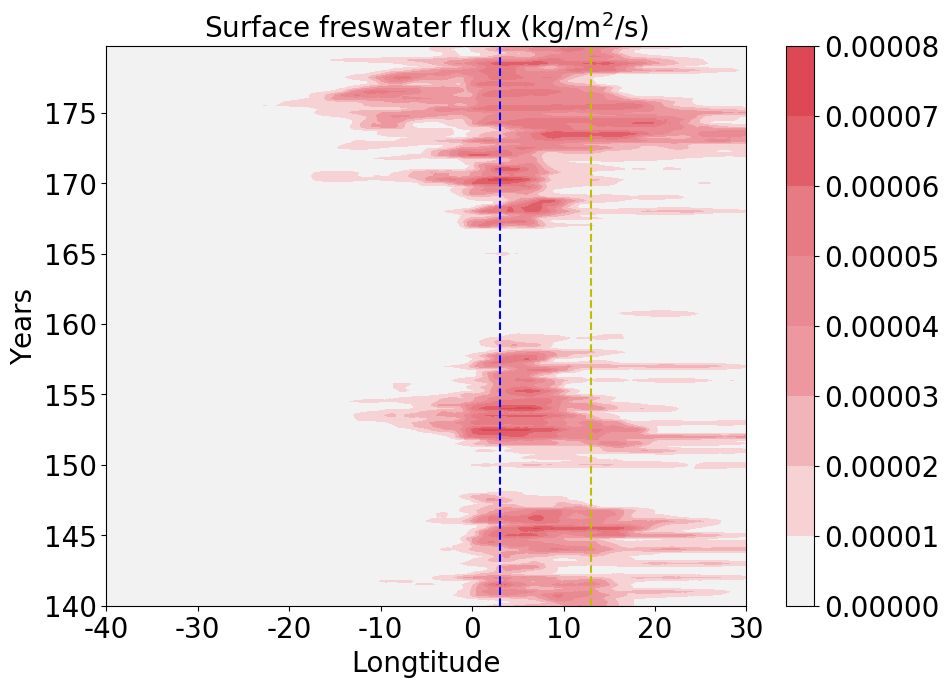

In [23]:
# plot the result
fig = plt.figure(figsize=(10, 7),dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result,cmap = new_cmap)
                  #,norm =norm,spacing = 'uniform',\
                  #levels = nice_levels)
plt.vlines(430, 0, 159, colors = "b",linestyles = "dashed")
plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0)#,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
#plt.clabel(CS, inline=0.1, fontsize=10)

#############################################################################
##设定X坐标值
plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)
plt.yticks(range(0,160,20), ['140', '145', '150', '155', '160','165','170','175','180'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Surface freswater flux (kg/m$^2$/s)',**my_font)
plt.savefig("fresh.png")